In [3]:
import numpy as np
import pandas as pd

mul_index = pd.MultiIndex.from_tuples([('cust_1', '2020'), ('cust_1', '2021'),

   ('cust_2', '2020'), ('cust_2', '2021')])  
data = pd.DataFrame(data=np.arange(16).reshape(4, 4),index=mul_index,
                 columns=['prd_1', 'prd_2', 'prd_3', 'prd_4'],
                 dtype='int')

In [4]:
mul_index

MultiIndex([('cust_1', '2020'),
            ('cust_1', '2021'),
            ('cust_2', '2020'),
            ('cust_2', '2021')],
           )

In [5]:
data

prd_1  prd_2  prd_3  prd_4
cust_1 2020      0      1      2      3
       2021      4      5      6      7
cust_2 2020      8      9     10     11
       2021     12     13     14     15

In [7]:
datastacked=data.stack()
datastacked

cust_1  2020  prd_1     0
              prd_2     1
              prd_3     2
              prd_4     3
        2021  prd_1     4
              prd_2     5
              prd_3     6
              prd_4     7
cust_2  2020  prd_1     8
              prd_2     9
              prd_3    10
              prd_4    11
        2021  prd_1    12
              prd_2    13
              prd_3    14
              prd_4    15
dtype: int32

In [8]:
datastacked['cust_2']

2020  prd_1     8
      prd_2     9
      prd_3    10
      prd_4    11
2021  prd_1    12
      prd_2    13
      prd_3    14
      prd_4    15
dtype: int32

In [9]:
datastacked['cust_2']['2020']['prd_1']

8

In [10]:
datastacked['cust_2']['2020'][['prd_1',"prd_2"]]

prd_1    8
prd_2    9
dtype: int32

In [11]:
datastacked.index

MultiIndex([('cust_1', '2020', 'prd_1'),
            ('cust_1', '2020', 'prd_2'),
            ('cust_1', '2020', 'prd_3'),
            ('cust_1', '2020', 'prd_4'),
            ('cust_1', '2021', 'prd_1'),
            ('cust_1', '2021', 'prd_2'),
            ('cust_1', '2021', 'prd_3'),
            ('cust_1', '2021', 'prd_4'),
            ('cust_2', '2020', 'prd_1'),
            ('cust_2', '2020', 'prd_2'),
            ('cust_2', '2020', 'prd_3'),
            ('cust_2', '2020', 'prd_4'),
            ('cust_2', '2021', 'prd_1'),
            ('cust_2', '2021', 'prd_2'),
            ('cust_2', '2021', 'prd_3'),
            ('cust_2', '2021', 'prd_4')],
           )

In [15]:
data.ix['cust_2','prd_3']=np.nan
data

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


prd_1  prd_2  prd_3  prd_4
cust_1 2020      0      1    2.0      3
       2021      4      5    6.0      7
cust_2 2020      8      9    NaN     11
       2021     12     13    NaN     15

In [16]:
data.stack()

cust_1  2020  prd_1     0.0
              prd_2     1.0
              prd_3     2.0
              prd_4     3.0
        2021  prd_1     4.0
              prd_2     5.0
              prd_3     6.0
              prd_4     7.0
cust_2  2020  prd_1     8.0
              prd_2     9.0
              prd_4    11.0
        2021  prd_1    12.0
              prd_2    13.0
              prd_4    15.0
dtype: float64

In [17]:
data.stack(dropna=False) 

cust_1  2020  prd_1     0.0
              prd_2     1.0
              prd_3     2.0
              prd_4     3.0
        2021  prd_1     4.0
              prd_2     5.0
              prd_3     6.0
              prd_4     7.0
cust_2  2020  prd_1     8.0
              prd_2     9.0
              prd_3     NaN
              prd_4    11.0
        2021  prd_1    12.0
              prd_2    13.0
              prd_3     NaN
              prd_4    15.0
dtype: float64

In [18]:
datastacked.unstack()

prd_1  prd_2  prd_3  prd_4
cust_1 2020      0      1      2      3
       2021      4      5      6      7
cust_2 2020      8      9     10     11
       2021     12     13     14     15

In [19]:
datastacked.unstack(level=0)

cust_1  cust_2
2020 prd_1       0       8
     prd_2       1       9
     prd_3       2      10
     prd_4       3      11
2021 prd_1       4      12
     prd_2       5      13
     prd_3       6      14
     prd_4       7      15

In [20]:
datastacked.unstack(level=1)

2020  2021
cust_1 prd_1     0     4
       prd_2     1     5
       prd_3     2     6
       prd_4     3     7
cust_2 prd_1     8    12
       prd_2     9    13
       prd_3    10    14
       prd_4    11    15

In [21]:
datastacked.unstack(level=-1)

prd_1  prd_2  prd_3  prd_4
cust_1 2020      0      1      2      3
       2021      4      5      6      7
cust_2 2020      8      9     10     11
       2021     12     13     14     15

In [22]:
data_wide = pd.DataFrame({"C1prd1" : {0 : "a", 1 : "b", 2 : "c"},

   "C1prd2" : {0 : "d", 1 : "e", 2 : "f"},

   "C2prd1" : {0 : 2.5, 1 : 1.2, 2 : .7},

   "C2prd2" : {0 : 3.2, 1 : 1.3, 2 : .1},

   "value" : dict(zip(range(3), np.random.randn(3)))

   })

In [29]:
data_wide
data_wide['seq_no']=data_wide.index
data_wide

,C1prd1,C1prd2,C2prd1,C2prd2,value,seq_no
0,a,d,2.5,3.2,1.264953,0
1,b,e,1.2,1.3,-0.027176,1
2,c,f,0.7,0.1,-0.627340,2


In [31]:
pd.wide_to_long(data_wide,['C1prd','C2prd'],i='seq_no',j='prd')

,,value,C1prd,C2prd
seq_no,prd,,,
0,1,1.264953,a,2.5
1,1,-0.027176,b,1.2
2,1,-0.627340,c,0.7
0,2,1.264953,d,3.2
1,2,-0.027176,e,1.3
2,2,-0.627340,f,0.1


In [27]:
data_wide.columns

Index(['C1prd1', 'C1prd2', 'C2prd1', 'C2prd2', 'value', 'seq_no'], dtype='object')

In [32]:
import numpy as np
import pandas as pd

data=pd.DataFrame({
    'id':['id1','id1','id1','id2','id2','id3'],
    'f1':['a','a','a','b','b','b'],
    'f2':['d','d','d','c','c','d']})
data

,id,f1,f2
0,id1,a,d
1,id1,a,d
2,id1,a,d
3,id2,b,c
4,id2,b,c
5,id3,b,d


In [34]:
pd.crosstab(data.f1,data.f2)

f2,c,d
f1,,
a,0,3
b,2,1


In [36]:
train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [45]:
pd.pivot_table(train,index='Sex',values='Survived',aggfunc=np.mean)


,Survived
Sex,
female,0.742038
male,0.188908


In [46]:
train.pivot_table(index='Sex',values='Survived',aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


In [47]:
train.pivot_table(index='Sex')

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Sex,,,,,,,
female,27.915709,44.479818,0.649682,431.028662,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,454.147314,2.389948,0.429809,0.188908


In [48]:
train.groupby('Sex')[['Survived']].describe()

Survived                                             
          count      mean       std  min  25%  50%  75%  max
Sex                                                         
female    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0
male      577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0

In [50]:
train.pivot_table(index=['Sex','Pclass'],values='Survived',aggfunc=np.mean)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [51]:
train.pivot_table('Survived',['Sex','Pclass'],aggfunc=np.mean)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [56]:
train['Survived_2']=(train.Sex=='female')&(train.Age>0)&(train.Embarked)

In [58]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived_2       0
dtype: int64

In [59]:
train['Survived_2'].value_counts()

False    632
True     259
Name: Survived_2, dtype: int64

In [60]:
train['Survived_2']=train['Survived_2'].astype(int)

In [70]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [62]:
from plotnine import *

In [63]:
import missingno as msno      
# 누락값 시각화

In [64]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived_2'],
      dtype='object')

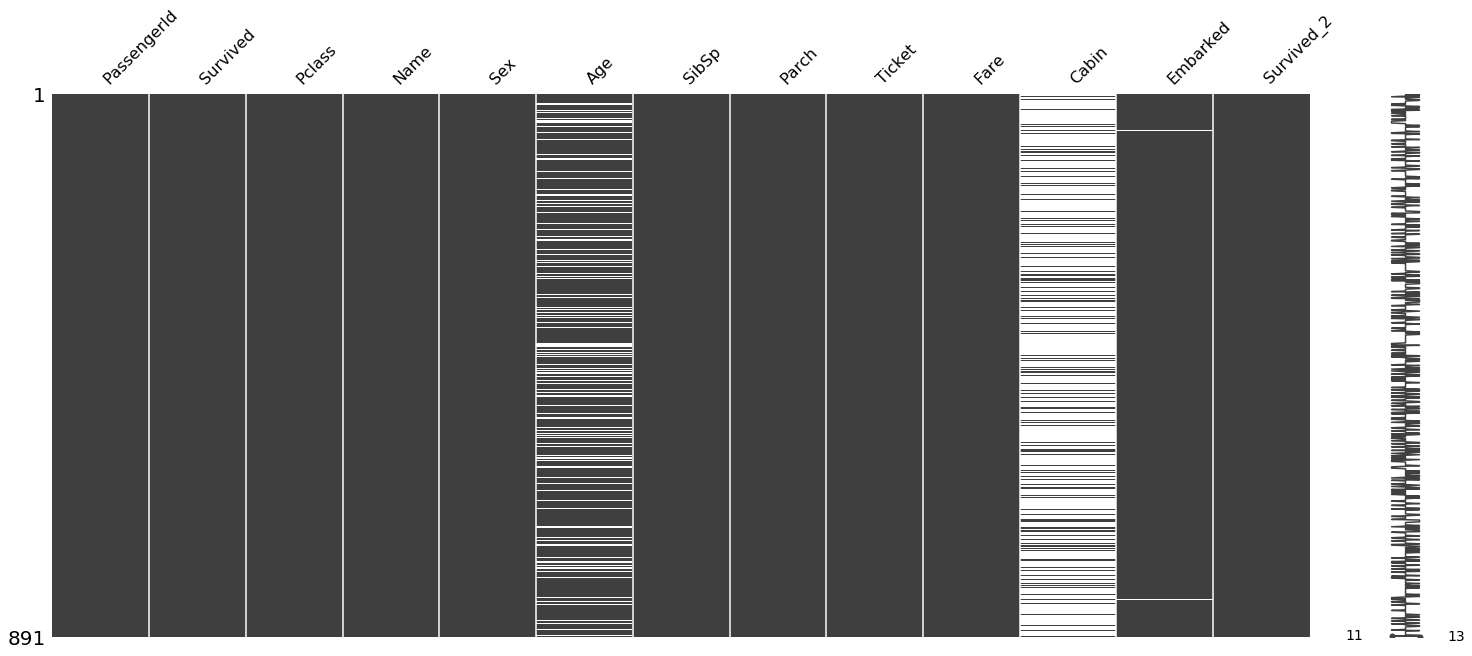

In [65]:
msno.matrix(train)

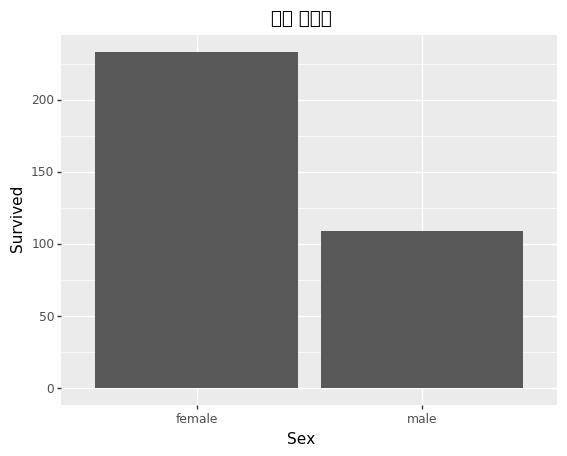

<ggplot: (-9223371902111996268)>

In [71]:
(ggplot(train)
 + aes(x='Sex',y='Survived')
 + geom_col()
 + ggtitle('성별 생존률')
)

In [84]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.shape
train.head()
test.head()
train.describe()
test.describe()
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [92]:
test['Survived']=(test.Sex=='female')&(test.Embarked)&(test.Age>0)
test.head()
test.isnull().sum()
test['Survived'].value_counts()

False    291
True     127
Name: Survived, dtype: int64

In [97]:
submission=test[['PassengerId','Survived']]
submission
submission['Survived']=submission['Survived'].astype(int)
submission.head()
submission.to_csv('submission.csv',index=False)

In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [105]:
obj_df=train.select_dtypes(include=['object'])
#obj_df['Name'].isnull().sum()
obj_df[obj_df.isnull().any(axis=1)].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
5,"Moran, Mr. James",male,330877,NaN,Q
7,"Palsson, Master. Gosta Leonard",male,349909,NaN,S


In [109]:
obj_df['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
F33            3
              ..
E36            1
C91            1
C103           1
D6             1
B41            1
Name: Cabin, Length: 147, dtype: int64

In [115]:
train.loc[train['Sex']=='male','Sex']=0
train.loc[train['Sex']=='female','Sex']=1

In [119]:
test.loc[test['Sex']=='female','Sex']=1
test.loc[test['Sex']=='male','Sex']=0
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Suvived,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,False,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,True,True
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,False,False
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,False,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S,False,False
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,True,True
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False,False
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S,False,False


In [120]:
from sklearn.preprocessing import LabelEncoder

In [121]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [127]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [126]:
le=LabelEncoder()
le.fit(['male','female'])
train['Sex']=le.transform(train['Sex'])
train["Sex"]

ValueError: y contains previously unseen labels: [0, 1]

In [133]:
def genToInt(data):
    le=LabelEncoder()
    le.fit(['male','female'])
    data['Sex']=le.transform(data['Sex'])
    return data
traincopy=genToInt(traincopy)
testcopy=genToInt(testcopy)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [132]:
traincopy=train.copy()
testcopy=test.copy()

In [139]:
dummy_columns=['Sex','Pclass','Embarked']

def myDummy(data,columns):
    for column in columns:
        data=pd.concat([data,pd.get_dummies(data[column],prefix=column)],axis=1)
        data=data.drop(column,axis=1)
    return data
        
  #column을 원핫인코딩하여 리턴  
trainDummy=myDummy(train, dummy_columns)
testDummy=myDummy(test, dummy_columns)
print('before')
print(train.shape)
print(test.shape)
print('after')
print(trainDummy.shape)
print(testDummy.shape)

before
(891, 12)
(418, 11)
after
(891, 17)
(418, 16)


In [140]:
trainDummy

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,1,0,1,0,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,0,1,0,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,1,0,0,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,1,1,0,0,1,0,0


In [146]:
trainX=trainX.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

NameError: name 'trainX' is not defined

In [148]:
trainDummy

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,0,1,0,0,0,1
887,1,19.0,0,0,30.0000,1,0,1,0,0,0,0,1
888,0,NaN,1,2,23.4500,1,0,0,0,1,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0,1,0,0


In [150]:
testDummy

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,1,0,0,1,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,1,0,0,0,1,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,1,0,1,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,1,0,0,1,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,NaN,0,1,0,0,1,0,0,1
414,1306,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,1,0,1,0,0,1,0,0
415,1307,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,1,0,0,1,0,0,1
416,1308,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,NaN,0,1,0,0,1,0,0,1


In [ ]:
# 목표:등수 올리기
# - 조건문 개선
# - Name => Age결측값 처리
# Mrs => Mrs 그룹 중앙값
# Miss => Miss 그룹 중앙값
# Mr => Mr 그룹 중앙값
# ...
# 나머지는 모두 동일하게 전체 그룹 평균/중앙값으로 대체
# -FamilySize 컬럼 추가(SibSp+Parch), binning
# (L/M/S)
